perceptron
------

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import random, itertools
random.seed(a=42)

In [2]:
class Perceptron:
    'A simple Perceptron implementation.'
    def __init__(self, weights, bias, alpha=0.1):
        self.weights = weights
        self.bias = bias
        self.alpha = alpha
    
    def propagate(self, x):
        return self.activation(self.net(x)) 
        
    def activation(self, net):
        if net > 0:
            return 1
        return 0
    
    def net(self, x):
        return np.dot(self.weights, x) + self.bias
    
    def learn(self, x, y):
        y_hat = self.propagate(x)
        self.weights = [w_i + self.alpha*x_i*(y-y_hat) for (w_i, x_i) in zip(self.weights, x)]
        self.bias = self.bias + self.alpha*(y-y_hat)
        return np.abs(y_hat - y)

In [3]:
size = 50 # size of data set
data = pd.DataFrame(columns=('$x_1$', '$x_2$'),
                    data=np.random.uniform(size=(size,2)))
data.head(10)

,$x_1$,$x_2$
0,0.817501,0.154447
1,0.755512,0.566045
2,0.772620,0.691022
3,0.649536,0.780694
4,0.585274,0.451515
5,0.621483,0.214858
6,0.879733,0.219064
7,0.137357,0.420979
8,0.715788,0.814104
9,0.406625,0.722113


In [4]:
def condition(x):
    return int(np.sum(x) > 1)
data['y'] = data.apply(condition, axis=1)
data.head(10)

,$x_1$,$x_2$,y
0,0.817501,0.154447,0
1,0.755512,0.566045,1
2,0.772620,0.691022,1
3,0.649536,0.780694,1
4,0.585274,0.451515,1
5,0.621483,0.214858,0
6,0.879733,0.219064,1
7,0.137357,0.420979,0
8,0.715788,0.814104,1
9,0.406625,0.722113,1


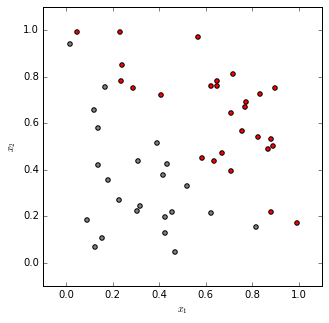

In [5]:
def plot_data(data, ax):
    data[data.y==1].plot(kind='scatter', x='$x_1$', y='$x_2$', color='Red', ax=ax)
    data[data.y==0].plot(kind='scatter', x='$x_1$', y='$x_2$', color='Gray', ax=ax)
    ax.set_xlim(-0.1,1.1); ax.set_ylim(-0.1,1.1)

fig = plt.figure(figsize=(5,5))
ax = fig.gca()
plot_data(data, ax)

In [6]:
def learn_data(perceptron, data):
    'Returns the number of errors made.'
    count = 0 
    for i, row in data.iterrows():
        count += perceptron.learn(row[0:2], row[2])
    return count

In [7]:
def threshold(perceptron, x_1):
    return (-perceptron.weights[0] * x_1 - perceptron.bias) / perceptron.weights[1]

def plot_perceptron_threshold(perceptron, ax):
    xlim = ax.get_xlim(); ylim = ax.get_ylim()
    x2s = [threshold(perceptron, x1) for x1 in xlim]
    ax.plot(xlim, x2s)
    ax.set_xlim(-0.1,1.1); ax.set_ylim(-0.1,1.1)

def plot_all(perceptron, data, t, ax=None):
    if ax==None:
        fig = plt.figure(figsize=(5,4))
        ax = fig.gca()
    plot_data(data, ax)
    plot_perceptron_threshold(perceptron, ax)
    
    ax.set_title('$t='+str(t+1)+'$')

In [8]:
def calc_error(perceptron, data):
    X = data[['$x_1$', '$x_2$']].values
    y = data.y
    preds = [perceptron.propagate(X[i]) for i in range(X.shape[0])]
    err = sum([int(preds[i] != y[i]) for i in range(X.shape[0])])
    return err*1.0/X.shape[0]

1  error:  0.18
2  error:  0.08
3  error:  0.0
4  error:  0.0
5  error:  0.0
6  error:  0.0


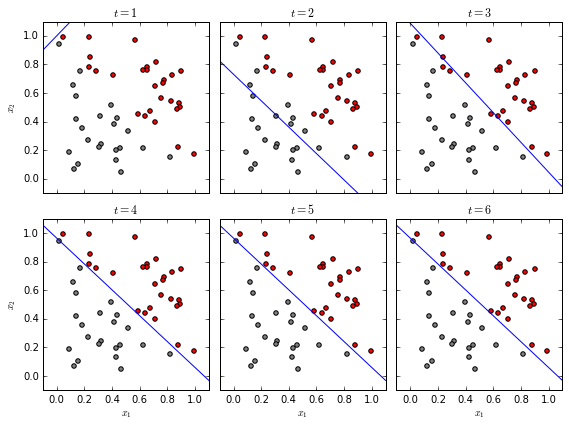

In [9]:
# vanilla perceptron
perceptron = Perceptron([0.1,-0.1],0.1)
errors = 0
f, axarr = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(8,6))
axs = list(itertools.chain.from_iterable(axarr))
for t in range(6):
    plot_all(perceptron, data, t, ax=axs[t])
    learn_data(perceptron, data)
    errors=calc_error(perceptron, data)
    print t+1,' error: ',errors
f.tight_layout()

1  error:  0.18
2  error:  0.08
3  error:  0.2
4  error:  0.1
5  error:  0.22
6  error:  0.22


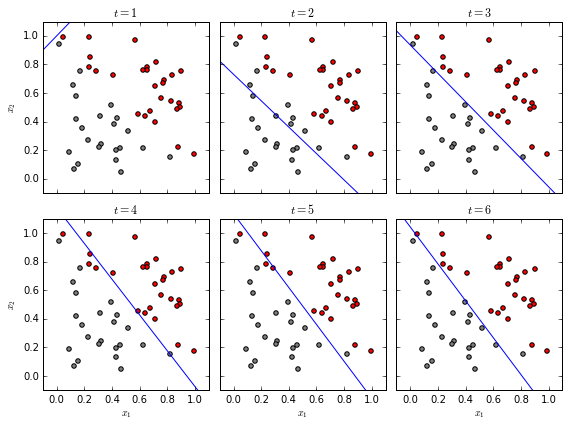

In [10]:
# averaged perceptron
# ideas: the ith perceptron.weight = average of all the weights from t(0) to t(i-1)
perceptron = Perceptron([0.1,-0.1],0.1)

f1, axarr = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(8,6))
axs = list(itertools.chain.from_iterable(axarr))

temp_w_a = []
temp_b_a = []
sum_w_a = [0,0]
sum_b_a = [0]
for t in range(6):
    plot_all(perceptron, data, t, ax=axs[t])
    learn_data(perceptron, data)
    errors_a = calc_error(perceptron, data) 
    print t+1,' error: ',errors_a
    temp_w_a.append(perceptron.weights)      
    temp_b_a.append(perceptron.bias)         
    sum_w_a = [i+j for i,j in zip(sum_w_a,temp_w_a[t])]  # sum of weights
    #print sum_w
    sum_b_a += temp_b_a[t]                               # sum of bias
    #print sum_b
    ave_w_a = [i/(t+1) for i in sum_w_a]          # average of weights
    ave_b_a = sum_b_a/(t+1)                       # average of bias
    perceptron.weights = ave_w_a                  # perceptrion.weights = averaged weight
    perceptron.bias = ave_b_a                     # perceptrion.bias = averaged bias

f1.tight_layout()
    

1  error:  0.18
2  error:  0.08
3  error:  0.24
4  error:  0.22
5  error:  0.0
6  error:  0.26


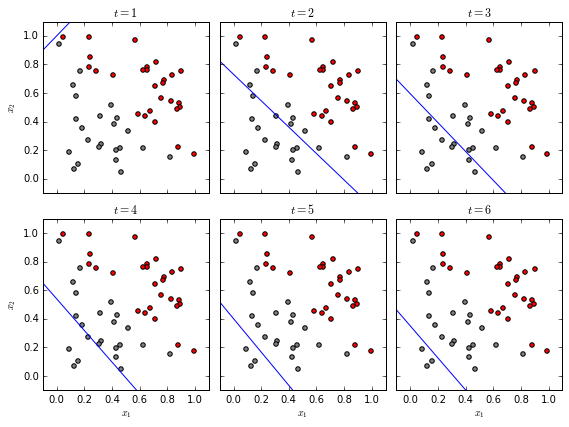

In [13]:
# weighted averaged perceptron
# the first time step has the lowest weights and the last the heaviest.

perceptron = Perceptron([0.1,-0.1],0.1)

f2, axarr = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(8,6))
axs = list(itertools.chain.from_iterable(axarr))

t_sum = 0                   # count each time step
sum_w_b = [0,0]
sum_b_b = [0]
for t in range(6):
    plot_all(perceptron, data, t, ax=axs[t])
    learn_data(perceptron, data)
    errors_b = calc_error(perceptron, data)
    print t+1,' error: ',errors_b
    temp_w_b = perceptron.weights     
    temp_b_b =  perceptron.bias
    t_sum += (t+1)
    sum_w_b = [i+j*(t+1) for i,j in zip(sum_w_b,temp_w_b)]  # sum of weights
    #print sum_w_b
    sum_b_b += temp_b_b                                     # sum of all bias
    #print sum_b_b
    ave_w_b = [i/(t+1)/t_sum for i in sum_w_b]              # weighted average of weights
    #print ave_w_b
    ave_b_b = sum_b_b/(t+1)/t_sum                           # weighted average of bias
    perceptron.weights = ave_w_b            # perceptrion.weights = weighted averaged weights
    perceptron.bias = ave_b_b               # perceptrion.bias = weighted averaged bias
    
f2.tight_layout()